C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


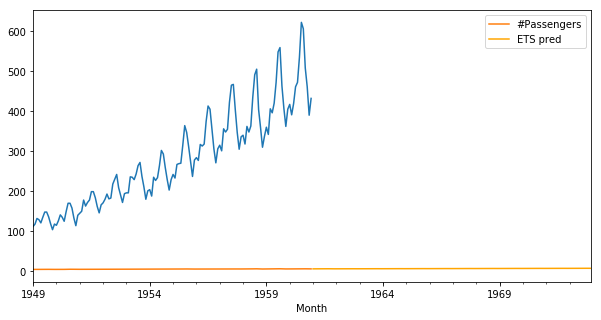

In [2]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt  # major lib for smoothening
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.seterr(divide = 'ignore') 


dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

dataset = pd.read_csv('C:/Users/DELL/Desktop/JT/AirPassengers.csv',parse_dates=['Month'],
                     index_col='Month',date_parser=dateparse)

ds = dataset['#Passengers']
ds.head()


ds.plot(kind="line",figsize=(10,5))

my_data = np.log(ds)


# In[13]:



fit = ExponentialSmoothing((my_data) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()
fit1 = fit.forecast(len(my_data))

my_data.plot(kind="line",figsize=(10,5),legend=True)
fit1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')


#seasonal_periods is the trend and seasonality patterns to change over time
#if it is 12 then the series was monthly data and the seasonal period repeated each year
